In [1]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import sys
import yaml
from tqdm import tqdm
import seaborn as sns

In [7]:
# Adding path to module
sys.path.append("../")
# picture path
PICS = "../pics/"
benchmark_runs = "./bench_runs/"
cpp_vals = "./cpp_bench/"

In [8]:
n_benchmark = 1

In [9]:
filenames_means = [
    "means_benchmark{0}_par0_seed3.pkl".format(n_benchmark),
    "means_benchmark{0}_par1_seed3.pkl".format(n_benchmark),
    "means_benchmark{0}_par2_seed3.pkl".format(n_benchmark),
    "means_benchmark{0}_par3_seed3.pkl".format(n_benchmark),
    "means_benchmark{0}_par4_seed3.pkl".format(n_benchmark)
]

filenames_vars = [
    "var_benchmark{0}_par0_seed3.pkl".format(n_benchmark),
    "var_benchmark{0}_par1_seed3.pkl".format(n_benchmark),
    "var_benchmark{0}_par2_seed3.pkl".format(n_benchmark),
    "var_benchmark{0}_par3_seed3.pkl".format(n_benchmark),
    "var_benchmark{0}_par4_seed3.pkl".format(n_benchmark)
]

In [11]:
#benchmark 1 data
if n_benchmark==1:
    data = np.loadtxt(cpp_vals+"cpp_model.csv", delimiter=",")
    data = {"is_recovered": data[:, 1], "is_infectious": data[:, 0], "is_latent": data[:, 2]}
else:
    data = np.loadtxt(cpp_vals+"benchmark_{0}_cpp.csv".format(n_benchmark), delimiter=",", skiprows=1)
    data = {"is_recovered": data[:, 3], "is_infectious": data[:, 2], "is_latent": data[:, 1]}

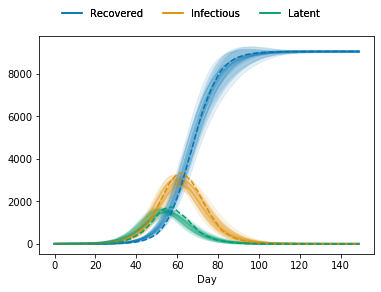

In [12]:
# benchmark 1 plot
fig, ax = plt.subplots(figsize=(6, 4))
colors = sns.color_palette("colorblind", 3)
df_means = []
df_vars = []
for s_n, v_n in zip(filenames_means, filenames_vars):
    stat_means = pd.read_pickle(benchmark_runs+s_n)
    df_means.append(stat_means)
    stat_var = pd.read_pickle(benchmark_runs+v_n)
    df_vars.append(stat_var)
    
    ax.plot(
        stat_means["is_recovered"] + stat_means["is_recovering"],
        alpha=0.3,
        color=colors[0],
        lw=2,
        label="Recovered",
    )
    ax.fill_between(
        range(0, len(stat_means["is_recovered"]), 1),
        (stat_means["is_recovered"] + stat_means["is_recovering"])
        - np.sqrt(stat_var["is_recovered"] ** 2 + stat_var["is_recovering"] ** 2) / 2.0,
        (stat_means["is_recovered"] + stat_means["is_recovering"])
        + np.sqrt(stat_var["is_recovered"] ** 2 + stat_var["is_recovering"] ** 2) / 2.0,
        color=colors[0],
        alpha=0.1,
    )
    ax.plot(
        stat_means["is_infectious"],
        color=colors[1],
        lw=2,
        alpha=0.3,
        label="Infectious",
    )
    ax.fill_between(
        range(0, len(stat_means["is_infectious"]), 1),
        stat_means["is_infectious"] - stat_var["is_infectious"] / 2.0,
        stat_means["is_infectious"] + stat_var["is_infectious"] / 2.0,
        color=colors[1],
        alpha=0.1,
    )
    ax.plot(
        stat_means["is_latent"], color=colors[2], lw=2, alpha=0.3, label="Latent"
    )
    ax.fill_between(
        range(0, len(stat_means["is_latent"]), 1),
        stat_means["is_latent"] - stat_var["is_latent"] / 2.0,
        stat_means["is_latent"] + stat_var["is_latent"] / 2.0,
        color=colors[2],
        alpha=0.1,
    )

ax.plot(data["is_recovered"], color=colors[0], ls="--")
ax.plot(data["is_infectious"], color=colors[1], ls="--")
ax.plot(data["is_latent"], color=colors[2], ls="--")

ax.set_xlabel("Day")
ax.set_ylabel("")

labels = ["Recovered", "Infectious", "Latent"]
handles = [
    mlines.Line2D([], [], color=c, ls="-", label=fr)
    for c, fr in zip(colors, labels)
]

l = fig.legend(
    loc='upper center',
    ncol=3,
    handles=handles,
    frameon=0,
    )

fig.add_artist(l)

In [ ]:
fig.savefig(PICS+"/benchmarks/Benchmark_{0}_pars.pdf".format(n_benchmark))